<a href="https://colab.research.google.com/github/vishanth10/fetch_data_project/blob/main/Fetch_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

### I have classified the Data explore, Data Cleaning, Answering questions in each segments of this collab Notebook (Please refer readme for detailed informations)

### Import the Dataset

In [51]:
from google.colab import files
import pandas as pd

uploaded = files.upload()  # This line uploads the files and stores them in 'uploaded'

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))



Saving PRODUCTS_TAKEHOME.csv to PRODUCTS_TAKEHOME (1).csv
Saving TRANSACTION_TAKEHOME.csv to TRANSACTION_TAKEHOME (1).csv
Saving USER_TAKEHOME.csv to USER_TAKEHOME (1).csv
User uploaded file "PRODUCTS_TAKEHOME (1).csv" with length 68782034 bytes
User uploaded file "TRANSACTION_TAKEHOME (1).csv" with length 6485605 bytes
User uploaded file "USER_TAKEHOME (1).csv" with length 8801821 bytes


In [52]:

products_df = pd.read_csv(list(uploaded.keys())[0] if uploaded else 'PRODUCTS_TAKEHOME.csv')
transactions_df = pd.read_csv(list(uploaded.keys())[1] if len(uploaded) > 1 else 'TRANSACTION_TAKEHOME.csv')
users_df = pd.read_csv(list(uploaded.keys())[2] if len(uploaded) > 2 else 'USER_TAKEHOME.csv')

In [53]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


In [54]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


In [55]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


Let's do Data Analysis and Data Cleaning

In [56]:
users_df.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


### Exploring & Cleaning each Table

#### USER - EDA

In [57]:
gender_distribution = users_df['GENDER'].value_counts()
print('gender distribution',gender_distribution)

gender distribution GENDER
female                    64240
male                      25829
transgender                1772
prefer_not_to_say          1350
non_binary                  473
unknown                     196
not_listed                  180
Non-Binary                   34
not_specified                28
My gender isn't listed        5
Prefer not to say             1
Name: count, dtype: int64


In [58]:
state_distribution = users_df['STATE'].value_counts()
print('state distribution',state_distribution)

state distribution STATE
TX    9028
FL    8921
CA    8589
NY    5703
IL    3794
GA    3718
PA    3644
OH    3519
NC    3399
NJ    2899
MI    2582
VA    2400
IN    2213
TN    2165
AL    1792
SC    1773
KY    1731
AZ    1728
MO    1652
MD    1636
MA    1523
WI    1389
PR    1361
LA    1290
WA    1234
CO    1139
MN    1125
CT    1110
OK    1100
AR    1011
MS     960
IA     933
NV     837
KS     835
OR     700
WV     674
UT     593
DE     492
NE     487
NM     452
ME     368
NH     359
HI     350
ID     350
AK     297
RI     284
DC     241
SD     205
ND     185
MT     169
WY     138
VT     111
Name: count, dtype: int64


In [59]:
# Analyze Language Distribution
language_distribution = users_df['LANGUAGE'].value_counts()
print('language distribution',language_distribution)

language distribution LANGUAGE
en        63403
es-419     6089
Name: count, dtype: int64


In [60]:
duplicate_rows = users_df.duplicated().sum()
print('duplicate rows',duplicate_rows)


duplicate rows 0


In [61]:
#Analysing NaN values
users_df.isna().sum()

,0
ID,0
CREATED_DATE,0
BIRTH_DATE,3675
STATE,4812
LANGUAGE,30508
GENDER,5892


#### Data Cleaning - USER

In [62]:
from datetime import datetime

# Ensure BIRTH_DATE is in datetime format
users_df['BIRTH_DATE'] = pd.to_datetime(users_df['BIRTH_DATE'], errors='coerce')

# Calculate mean date
mean_timestamp = users_df['BIRTH_DATE'].dropna().astype(int).mean()
mean_birth_date = pd.to_datetime(mean_timestamp)

# Fill missing BIRTH_DATE with mean date
users_df['BIRTH_DATE'].fillna(mean_birth_date, inplace=True)

# Recalculate AGE
users_df['AGE'] = users_df['BIRTH_DATE'].apply(
    lambda x: datetime.now().year - x.year if pd.notnull(x) else None
)

<ipython-input-62-953253f8d271>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users_df['BIRTH_DATE'].fillna(mean_birth_date, inplace=True)
<ipython-input-62-953253f8d271>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1984-09-02 02:39:04.710417856' has dtype incompatible with datetime64[ns, UTC], please explicitly cast to a compatible dtype first.
  users_df['BIRTH_DATE'].fillna(mean_birth_date, inplace=True)


In [63]:
print(users_df['BIRTH_DATE'].isnull().sum())

0


In [64]:
print(users_df[['BIRTH_DATE', 'AGE']].head())

                      BIRTH_DATE  AGE
0      2000-08-11 00:00:00+00:00   25
1      2001-09-24 04:00:00+00:00   24
2      1994-10-28 00:00:00+00:00   31
3  1984-09-02 02:39:04.710417856   41
4      1972-03-19 00:00:00+00:00   53


In [65]:
# Fill missing LANGUAGE with the most frequent value ('en')
users_df['LANGUAGE'].fillna(users_df['LANGUAGE'].mode()[0], inplace=True)

# Fill missing STATE with the most frequent value ('TX')
users_df['STATE'].fillna(users_df['STATE'].mode()[0], inplace=True)

# Fill missing GENDER with 'Unknown'
users_df['GENDER'].fillna('Unknown', inplace=True)

# Verify the changes
print("Missing values after filling:")
print(users_df.isnull().sum())


Missing values after filling:
ID              0
CREATED_DATE    0
BIRTH_DATE      0
STATE           0
LANGUAGE        0
GENDER          0
AGE             0
dtype: int64


<ipython-input-65-8bb57278c9a1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users_df['LANGUAGE'].fillna(users_df['LANGUAGE'].mode()[0], inplace=True)
<ipython-input-65-8bb57278c9a1>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

#### USER (GRAPH)

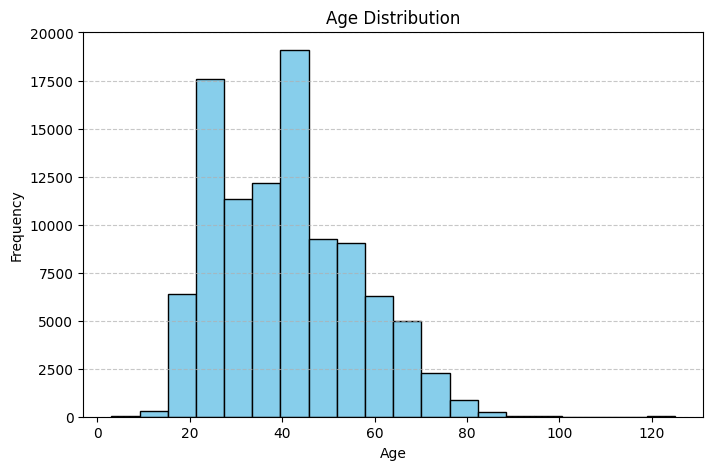

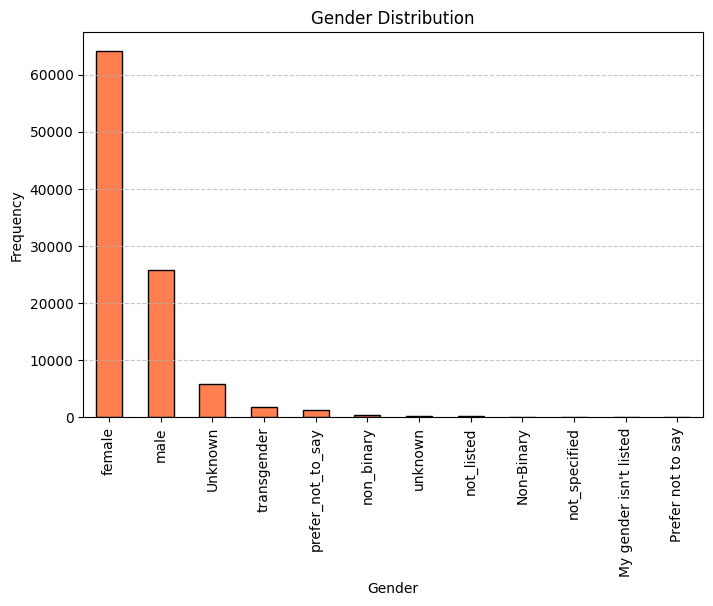

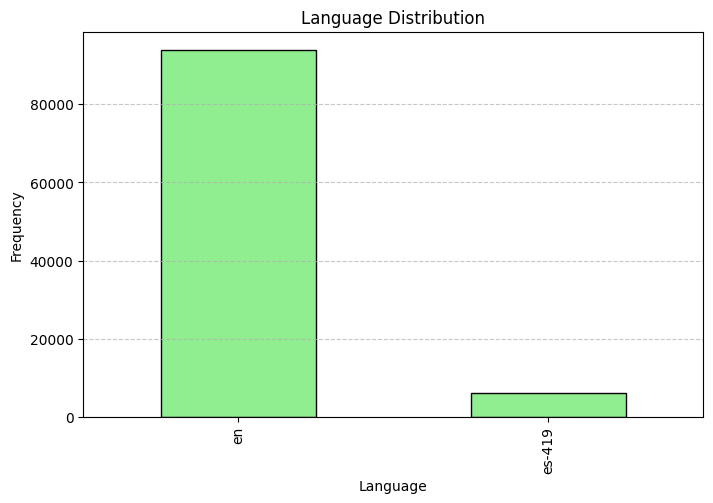

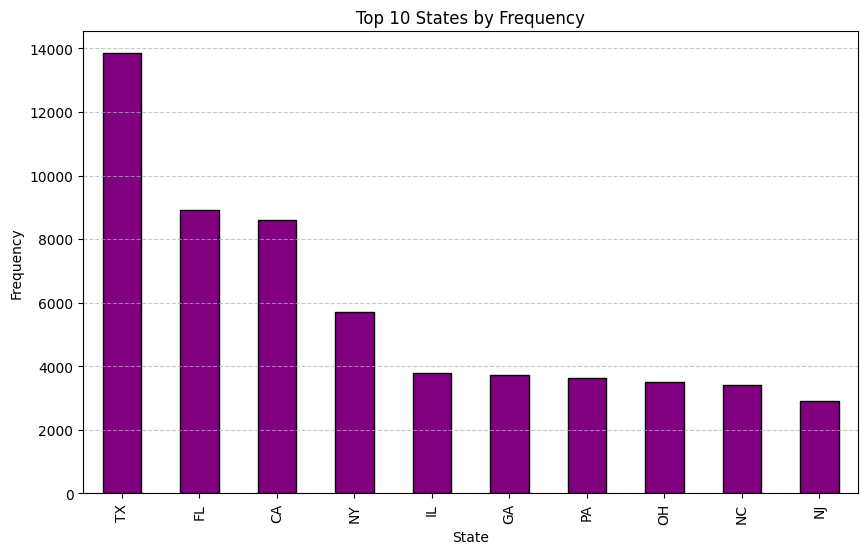

In [66]:
import matplotlib.pyplot as plt

# Plot histogram for AGE
plt.figure(figsize=(8, 5))
plt.hist(users_df['AGE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot bar chart for GENDER
plt.figure(figsize=(8, 5))
users_df['GENDER'].value_counts().plot(kind='bar', color='coral', edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot bar chart for LANGUAGE
plt.figure(figsize=(8, 5))
users_df['LANGUAGE'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot bar chart for STATE
plt.figure(figsize=(10, 6))
users_df['STATE'].value_counts().head(10).plot(kind='bar', color='purple', edgecolor='black')
plt.title('Top 10 States by Frequency')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Product Table

#### PRODUCT - EDA

In [67]:
products_df.shape

(845552, 7)

In [68]:
products_df.dtypes

,0
CATEGORY_1,object
CATEGORY_2,object
CATEGORY_3,object
CATEGORY_4,object
MANUFACTURER,object
BRAND,object
BARCODE,float64


In [69]:
products_df.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [70]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


In [71]:
products_df['CATEGORY_1'].value_counts()

,count
CATEGORY_1,
Health & Wellness,512695
Snacks,324817
Beverages,3990
Pantry,871
Apparel & Accessories,846
Dairy,602
Needs Review,547
Alcohol,503
Home & Garden,115


In [72]:
products_df['CATEGORY_2'].value_counts()

,count
CATEGORY_2,
Candy,121036
Hair Care,111482
Medicines & Treatments,99118
Bath & Body,81469
Skin Care,62587
...,...
Games,1
Vehicle Storage & Cargo,1
Audio,1


In [73]:
products_df['CATEGORY_3'].value_counts()

,count
CATEGORY_3,
Confection Candy,56965
Vitamins & Herbal Supplements,55700
Chocolate Candy,47710
Hair Styling Products,20450
Reading Glasses,20394
...,...
Fuel Containers & Tanks,1
Beans,1
Dry Pasta,1


In [74]:
products_df['CATEGORY_4'].value_counts()

,count
CATEGORY_4,
Lip Balms,9737
Already Popped Popcorn,6974
Sleep Aids,4978
Hair Brushes & Combs,4724
Women's Shaving Gel & Cream,3874
...,...
Sherbet,1
Coconut Milk,1
Corn Syrup,1


In [75]:
products_df['CATEGORY_4'].count()

67459

#### PRODUCT CLEANING

In [76]:
products_df.isna().sum()

,0
CATEGORY_1,111
CATEGORY_2,1424
CATEGORY_3,60566
CATEGORY_4,778093
MANUFACTURER,226474
BRAND,226472
BARCODE,4025


In [77]:
products_df.duplicated().sum()

215

In [78]:
# Percentage of Missing Values
products_df.isna().sum()/845552 * 100

,0
CATEGORY_1,0.013128
CATEGORY_2,0.168411
CATEGORY_3,7.162895
CATEGORY_4,92.021898
MANUFACTURER,26.784160
BRAND,26.783923
BARCODE,0.476020


In [79]:
# Drop CATEGORY_4 due to excessive missing data
products_df.drop(columns=['CATEGORY_4'], inplace=True)

In [80]:
# Fill missing CATEGORY_1 values with 'Others'
products_df['CATEGORY_1'] = products_df['CATEGORY_1'].fillna('Others')

# Ensure CATEGORY_1, CATEGORY_2, and CATEGORY_3 are strings
products_df['CATEGORY_1'] = products_df['CATEGORY_1'].astype(str)
products_df['CATEGORY_2'] = products_df['CATEGORY_2'].astype(str)
products_df['CATEGORY_3'] = products_df['CATEGORY_3'].astype(str)

# Fill missing CATEGORY_2 values with CATEGORY_1 + " Other"
products_df['CATEGORY_2'] = products_df.apply(
    lambda row: row['CATEGORY_1'] + " Other" if row['CATEGORY_2'] == 'nan' else row['CATEGORY_2'], axis=1
)

# Fill missing CATEGORY_3 values with CATEGORY_2 + " Other"
products_df['CATEGORY_3'] = products_df.apply(
    lambda row: row['CATEGORY_2'] + " Other" if row['CATEGORY_3'] == 'nan' else row['CATEGORY_3'], axis=1
)

In [81]:
print("\nMissing Values After Cleaning:")
print(products_df.isnull().sum())
print("\nSample Rows After Cleaning:")
print(products_df.head())


Missing Values After Cleaning:
CATEGORY_1           0
CATEGORY_2           0
CATEGORY_3           0
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64

Sample Rows After Cleaning:
          CATEGORY_1              CATEGORY_2                   CATEGORY_3  \
0  Health & Wellness           Sexual Health  Conductivity Gels & Lotions   
1             Snacks           Puffed Snacks         Cheese Curls & Puffs   
2  Health & Wellness               Hair Care        Hair Care Accessories   
3  Health & Wellness               Oral Care                   Toothpaste   
4  Health & Wellness  Medicines & Treatments               Essential Oils   

                                        MANUFACTURER            BRAND  \
0                                                NaN              NaN   
1                                                NaN              NaN   
2                           PLACEHOLDER MANUFACTURER          ELECSOP   
3                                

In [82]:
products_df['MANUFACTURER'].fillna('Unknown')
products_df['BRAND'].fillna('Unknown')

,BRAND
0,Unknown
1,Unknown
2,ELECSOP
3,COLGATE
4,MAPLE HOLISTICS
...,...
845547,Unknown
845548,LOFTHOUSE
845549,HARIBO
845550,JUMBO


In [83]:
# Remove duplicate rows
products_df.drop_duplicates(inplace=True)

In [84]:
# DROP ROW FOR MISSING BARCODE AS BARCODE IS KEY PRIMARY KEY AND FOREIGN KEY TO MAINTAIN INTERGRITY NEED TO DROP IT

# products_df.dropna(subset=['BARCODE'], inplace=True)

products_df['BARCODE'] = products_df['BARCODE'].fillna(0).astype(int)

## Transaction Table

#### TRANSACT EDA

In [85]:
transactions_df.shape

(50000, 8)

In [86]:
transactions_df.dtypes

,0
RECEIPT_ID,object
PURCHASE_DATE,object
SCAN_DATE,object
STORE_NAME,object
USER_ID,object
BARCODE,float64
FINAL_QUANTITY,object
FINAL_SALE,object


In [87]:
transactions_df.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


#### TRANSACT - DATA CLEANING

In [88]:
#FINAL SALE

transactions_df['FINAL_SALE'].value_counts()

transactions_df.isna().sum()

,0
RECEIPT_ID,0
PURCHASE_DATE,0
SCAN_DATE,0
STORE_NAME,0
USER_ID,0
BARCODE,5762
FINAL_QUANTITY,0
FINAL_SALE,0


In [89]:
print(transactions_df.isnull().sum())

RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64


In [90]:
# Convert PURCHASE_DATE and SCAN_DATE to datetime
transactions_df['PURCHASE_DATE'] = pd.to_datetime(transactions_df['PURCHASE_DATE'])
transactions_df['SCAN_DATE'] = pd.to_datetime(transactions_df['SCAN_DATE'])


In [91]:
transactions_df.dtypes

,0
RECEIPT_ID,object
PURCHASE_DATE,datetime64[ns]
SCAN_DATE,"datetime64[ns, UTC]"
STORE_NAME,object
USER_ID,object
BARCODE,float64
FINAL_QUANTITY,object
FINAL_SALE,object


In [92]:
transactions_df.duplicated().sum()

171

In [93]:
transactions_df.drop_duplicates(inplace=True)

In [96]:
transactions_df['FINAL_QUANTITY'] = pd.to_numeric(
    transactions_df['FINAL_QUANTITY'], errors='coerce'
).fillna(0)

# Clean FINAL_SALE
# Convert invalid values to 0, ensure the column is numeric
transactions_df['FINAL_SALE'] = pd.to_numeric(
    transactions_df['FINAL_SALE'], errors='coerce'
).fillna(0)

In [97]:
transactions_df.dtypes

,0
RECEIPT_ID,object
PURCHASE_DATE,datetime64[ns]
SCAN_DATE,"datetime64[ns, UTC]"
STORE_NAME,object
USER_ID,object
BARCODE,float64
FINAL_QUANTITY,float64
FINAL_SALE,float64


## DATA VISUALISATION

<ipython-input-98-4bf1b77c637c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette='viridis')


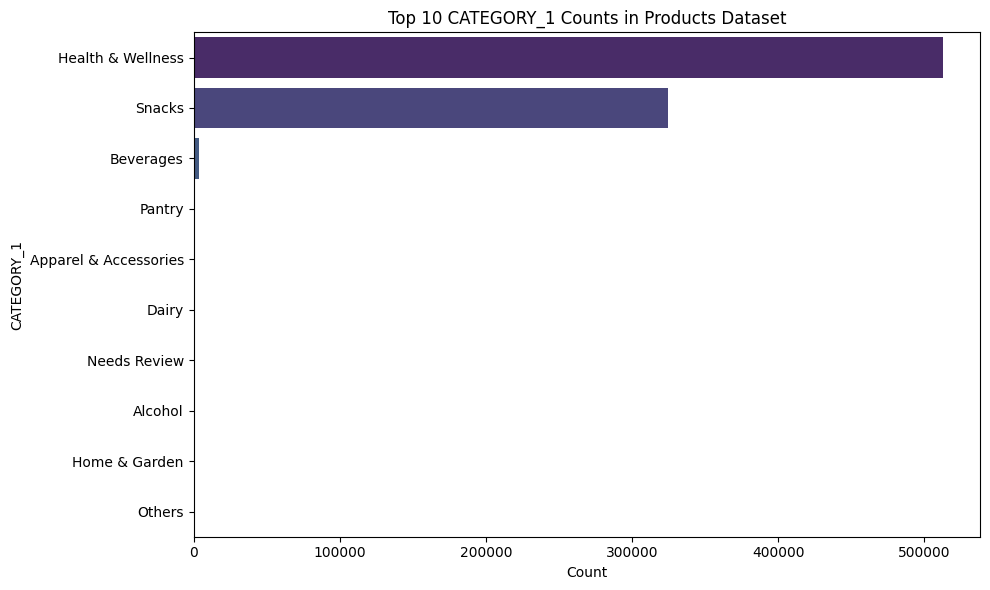

In [98]:
plt.figure(figsize=(10, 6))
top_10_categories = products_df['CATEGORY_1'].value_counts().head(10)
sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette='viridis')
plt.title('Top 10 CATEGORY_1 Counts in Products Dataset')
plt.xlabel('Count')
plt.ylabel('CATEGORY_1')
plt.tight_layout()
plt.show()

<ipython-input-101-a3b9f4dfe5cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette='viridis')


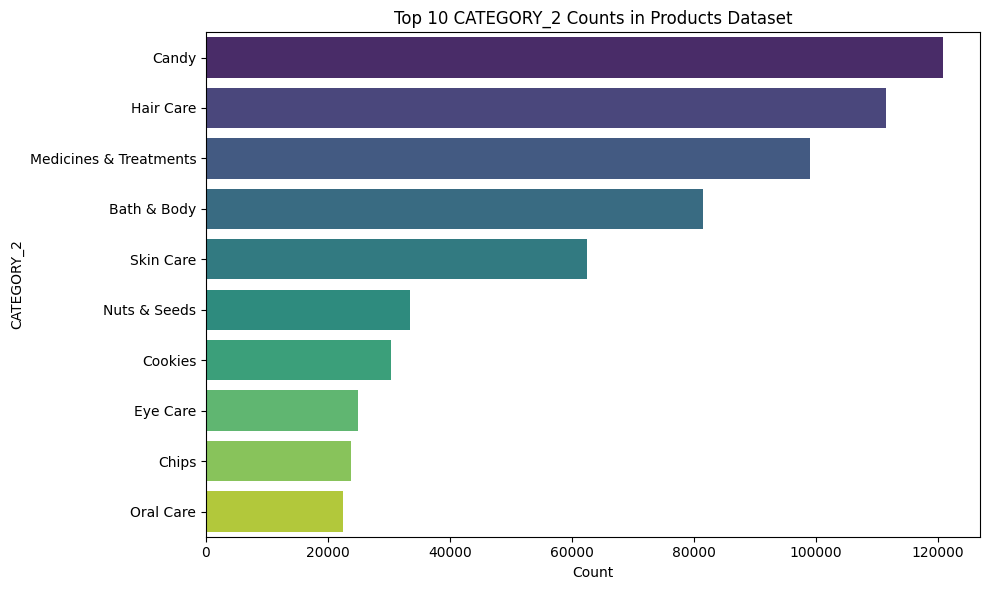

In [101]:
plt.figure(figsize=(10, 6))
top_10_categories = products_df['CATEGORY_2'].value_counts().head(10)
sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette='viridis')
plt.title('Top 10 CATEGORY_2 Counts in Products Dataset')
plt.xlabel('Count')
plt.ylabel('CATEGORY_2')
plt.tight_layout()
plt.show()

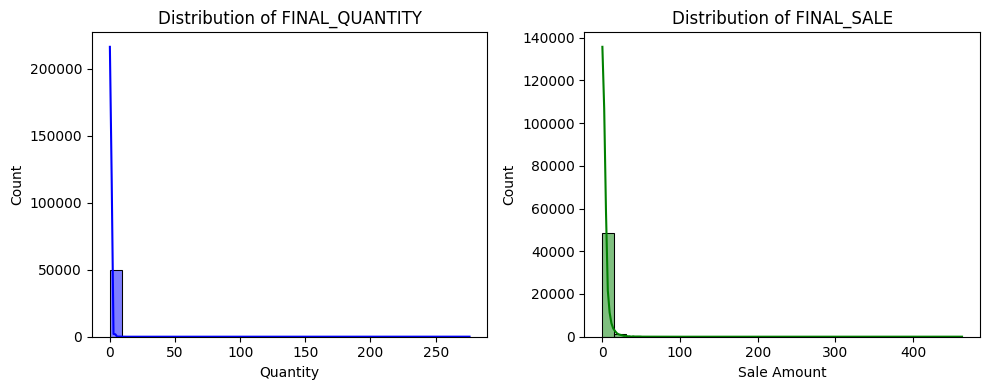

In [99]:

plt.figure(figsize=(10, 4))

# Drop missing or invalid values before plotting
final_quantity_clean = transactions_df['FINAL_QUANTITY'].dropna()

plt.subplot(1, 2, 1)
sns.histplot(final_quantity_clean, bins=30, kde=True, color='blue')
plt.title('Distribution of FINAL_QUANTITY')
plt.xlabel('Quantity')


final_sale_clean = transactions_df['FINAL_SALE'].dropna()

plt.subplot(1, 2, 2)
sns.histplot(final_sale_clean, bins=30, kde=True, color='green')
plt.title('Distribution of FINAL_SALE')
plt.xlabel('Sale Amount')

plt.tight_layout()
plt.show()


## KEY QUESTIONS

- Are there any data quality issues present?

- Are there any fields that are challenging to understand?


In [105]:
users_transactions_df = users_df.merge(transactions_df, how='left', left_on='ID', right_on='USER_ID')

# Merge the resulting dataframe with Products on BARCODE (left join)
final_merged_df = users_transactions_df.merge(products_df, how='left', on='BARCODE')

# Confirm the shape and first few rows of the merged dataframe
print(final_merged_df.shape)




(100170, 20)


## JOINING TABLES

In [106]:
final_merged_df.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,CATEGORY_1,CATEGORY_2,CATEGORY_3,MANUFACTURER,BRAND
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00+00:00,CA,es-419,female,25,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00+00:00,PA,en,female,24,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00+00:00,FL,es-419,female,31,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,1984-09-02 02:39:04.710417856,NC,en,Unknown,41,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00+00:00,PA,en,female,53,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
final_merged_df.dtypes

,0
ID,object
CREATED_DATE,object
BIRTH_DATE,object
STATE,object
LANGUAGE,object
GENDER,object
AGE,int64
RECEIPT_ID,object
PURCHASE_DATE,datetime64[ns]
SCAN_DATE,"datetime64[ns, UTC]"


## ANALYSIS AND QUESTIONS

- What are the top 5 brands by receipts scanned among users 21 and over?
- What are the top 5 brands by sales among users that have had their account for at least six months?
- What is the percentage of sales in the Health & Wellness category by generation?


## PART 2 - CLOSED ENDED

In [130]:
from datetime import datetime, timedelta

# Calculate age of users (21 and over filter)
users_df['BIRTH_DATE'] = pd.to_datetime(users_df['BIRTH_DATE'], errors='coerce')
users_df['AGE'] = datetime.now().year - users_df['BIRTH_DATE'].dt.year

# Filter for users 21 and over
users_21_and_over = final_merged_df[final_merged_df['AGE'] >= 21]

# Top 5 brands by receipts scanned among users 21 and over
top_brands_by_receipts = (
    users_21_and_over.groupby('BRAND')['RECEIPT_ID']
    .count()
    .sort_values(ascending=False)
    .head(5)
)



In [131]:
top_brands_by_receipts

,RECEIPT_ID
BRAND,
NERDS CANDY,6
DOVE,6
SOUR PATCH KIDS,4
TRIDENT,4
MEIJER,4


<ipython-input-132-dade935c8223>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands_by_receipts.values, y=top_brands_by_receipts.index, palette="viridis")


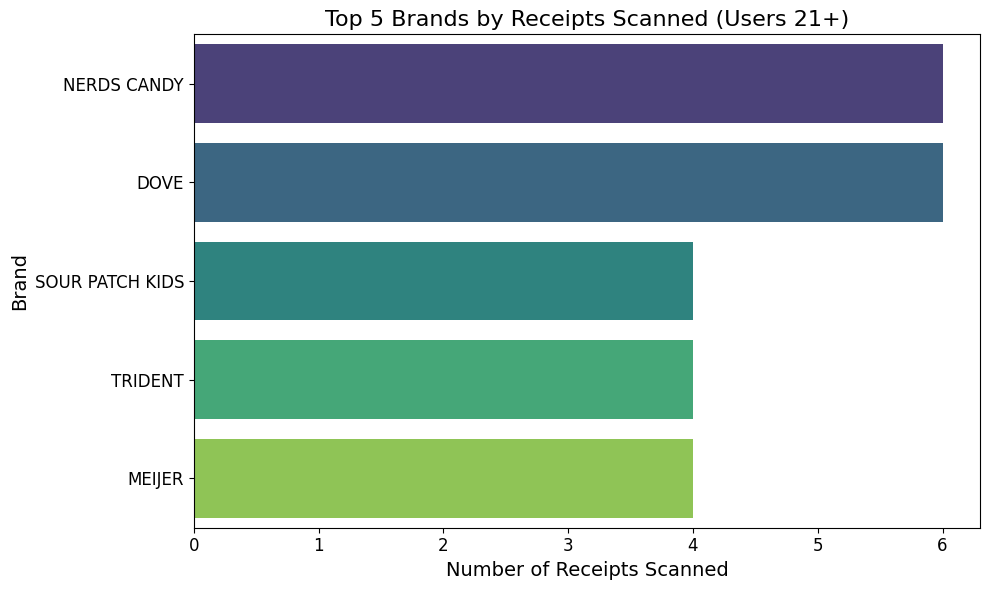

In [132]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands_by_receipts.values, y=top_brands_by_receipts.index, palette="viridis")
plt.title('Top 5 Brands by Receipts Scanned (Users 21+)', fontsize=16)
plt.xlabel('Number of Receipts Scanned', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [137]:


today_date = datetime(2025, 1, 20)

final_merged_df['CREATED_DATE'] = pd.to_datetime(final_merged_df['CREATED_DATE'], errors='coerce')


final_merged_df['ACCOUNT_AGE_MONTHS'] = (
    (today_date.year - final_merged_df['CREATED_DATE'].dt.year) * 12
    + (today_date.month - final_merged_df['CREATED_DATE'].dt.month)
)


# Filter for users with accounts older than 6 months
users_6_months_or_older = final_merged_df[final_merged_df['ACCOUNT_AGE_MONTHS'] >= 6]

# Top 5 brands by sales among users with accounts for at least 6 months
top_brands_by_sales = (
    users_6_months_or_older.groupby('BRAND')['FINAL_SALE']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

def classify_generation_by_age(age):
    if pd.isna(age):
        return "Older"
    elif age >= 78:  # Born 78 and above
        return "Silent"
    elif age >= 59:  # Born 59-78
        return "Boomers"
    elif age >= 43:  # Born 43-59
        return "Gen X"
    elif age >= 27:  # Born 27-43
        return "Millennials"
    else:            # Born <27
        return "Gen Z"

# Use AGE column to classify generations
final_merged_df['GENERATION'] = final_merged_df['AGE'].apply(classify_generation_by_age)

# Filter for Health & Wellness category
health_and_wellness_sales = final_merged_df[final_merged_df['CATEGORY_1'] == 'Health & Wellness']




In [148]:
# Calculate sales percentage by generation
sales_by_generation = (
    health_and_wellness_sales.groupby('GENERATION')['FINAL_SALE']
    .sum()/ health_and_wellness_sales['FINAL_SALE'].sum()
    * 100

)

sales_by_generation

,FINAL_SALE
GENERATION,
Boomers,48.460403
Gen X,32.463355
Millennials,19.076242


<ipython-input-150-1e27ab65a511>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_generation.values, y=sales_by_generation.index, palette="coolwarm")


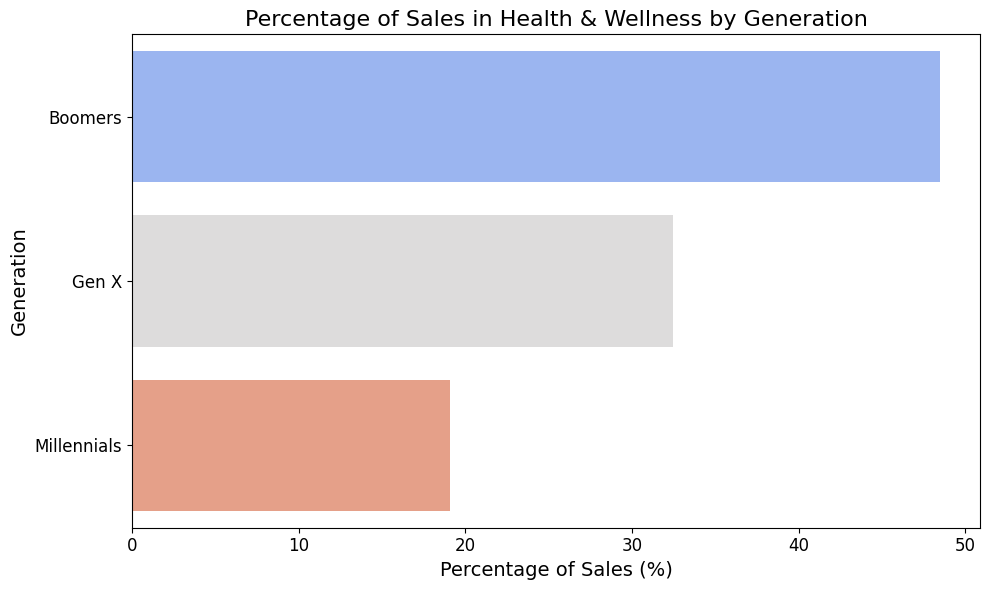

In [150]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_generation.values, y=sales_by_generation.index, palette="coolwarm")
plt.title('Percentage of Sales in Health & Wellness by Generation', fontsize=16)
plt.xlabel('Percentage of Sales (%)', fontsize=14)
plt.ylabel('Generation', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-124-f0fc89b9419a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


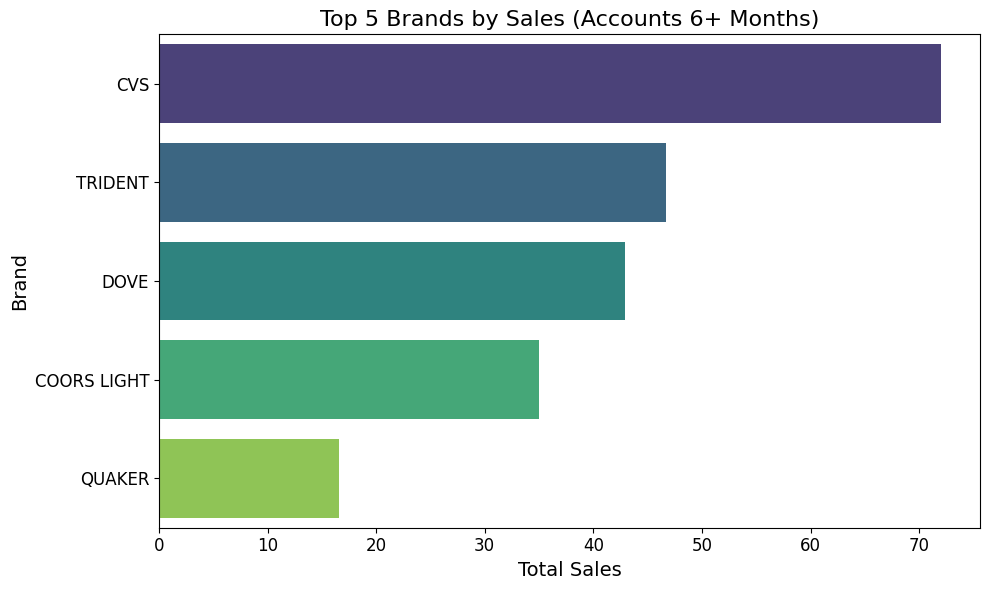

In [124]:

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_brands_by_sales.values,
    y=top_brands_by_sales.index,
    palette="viridis"
)
plt.title('Top 5 Brands by Sales (Accounts 6+ Months)', fontsize=16)
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## PART 2 - OPEN ENDED QUESTIONS

<ipython-input-152-3f090788a3eb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


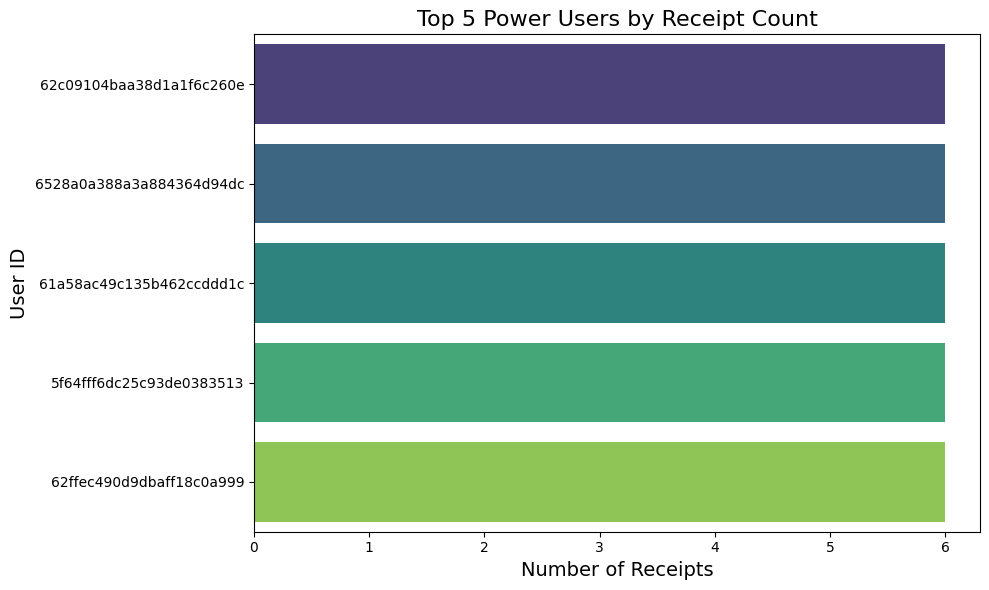

<ipython-input-152-3f090788a3eb>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


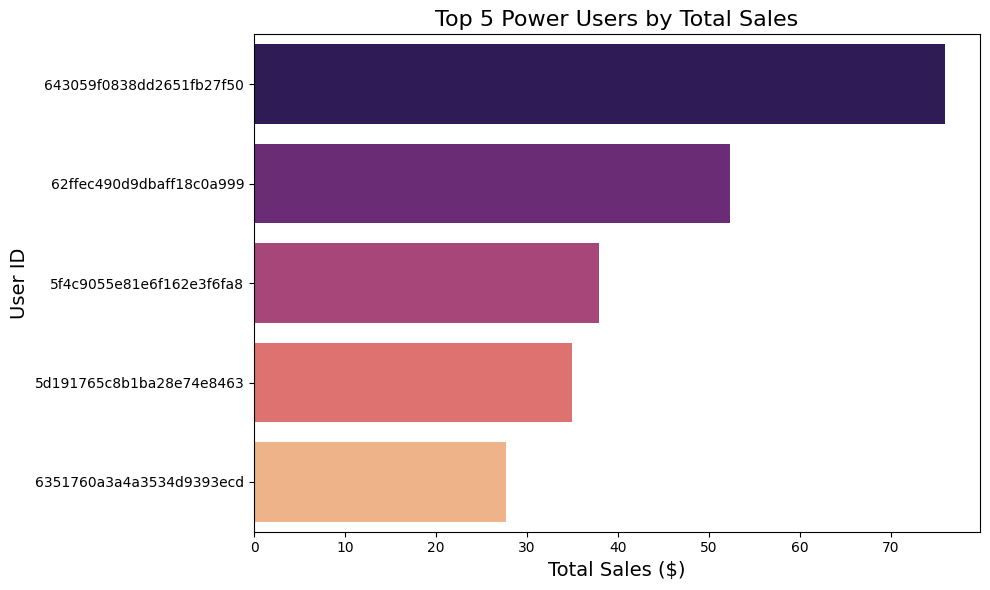

In [152]:
# Identify power users by receipt count and total sales
user_engagement = final_merged_df.groupby('USER_ID').agg(
    receipt_count=('RECEIPT_ID', 'count'),
    total_sales=('FINAL_SALE', 'sum')
)

# Define power users as the top 5 by both metrics
power_users_by_receipts = user_engagement.sort_values('receipt_count', ascending=False).head(5)
power_users_by_sales = user_engagement.sort_values('total_sales', ascending=False).head(5)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(
    x=power_users_by_receipts['receipt_count'],
    y=power_users_by_receipts.index,
    palette="viridis"
)
plt.title("Top 5 Power Users by Receipt Count", fontsize=16)
plt.xlabel("Number of Receipts", fontsize=14)
plt.ylabel("User ID", fontsize=14)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=power_users_by_sales['total_sales'],
    y=power_users_by_sales.index,
    palette="magma"
)
plt.title("Top 5 Power Users by Total Sales", fontsize=16)
plt.xlabel("Total Sales ($)", fontsize=14)
plt.ylabel("User ID", fontsize=14)
plt.tight_layout()
plt.show()


In [155]:
# Filter for Dips & Salsa category
dips_and_salsa_sales = final_merged_df[final_merged_df['CATEGORY_2'] == 'Dips & Salsa']

# Calculate total sales by brand
leading_brand = (
    dips_and_salsa_sales.groupby('BRAND')['FINAL_SALE']
    .sum()
    .sort_values(ascending=False)
    .head(1)
)

# Print the leading brand
print("Leading Brand in Dips & Salsa Category:", leading_brand.index[0], "with sales of $", leading_brand.values[0])


Leading Brand in Dips & Salsa Category: MARZETTI with sales of $ 5.99


In [160]:
# Convert PURCHASE_DATE to datetime
transactions_df['PURCHASE_DATE'] = pd.to_datetime(transactions_df['PURCHASE_DATE'], errors='coerce')

# Extract year from PURCHASE_DATE
transactions_df['PURCHASE_YEAR'] = transactions_df['PURCHASE_DATE'].dt.year

# Calculate total sales by year
sales_by_year = transactions_df.groupby('PURCHASE_YEAR')['FINAL_SALE'].sum().sort_index()

# Calculate YoY growth
sales_growth = sales_by_year.pct_change() * 100



In [165]:
# Extract year from PURCHASE_DATE
transactions_df['PURCHASE_MONTH'] = transactions_df['PURCHASE_DATE'].dt.month
transactions_df['PURCHASE_MONTH'].value_counts()

,count
PURCHASE_MONTH,
7,18539
8,17097
6,10832
9,3361


<ipython-input-169-d5c47a3798d6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transactions_by_month.index, y=transactions_by_month.values, palette="coolwarm")


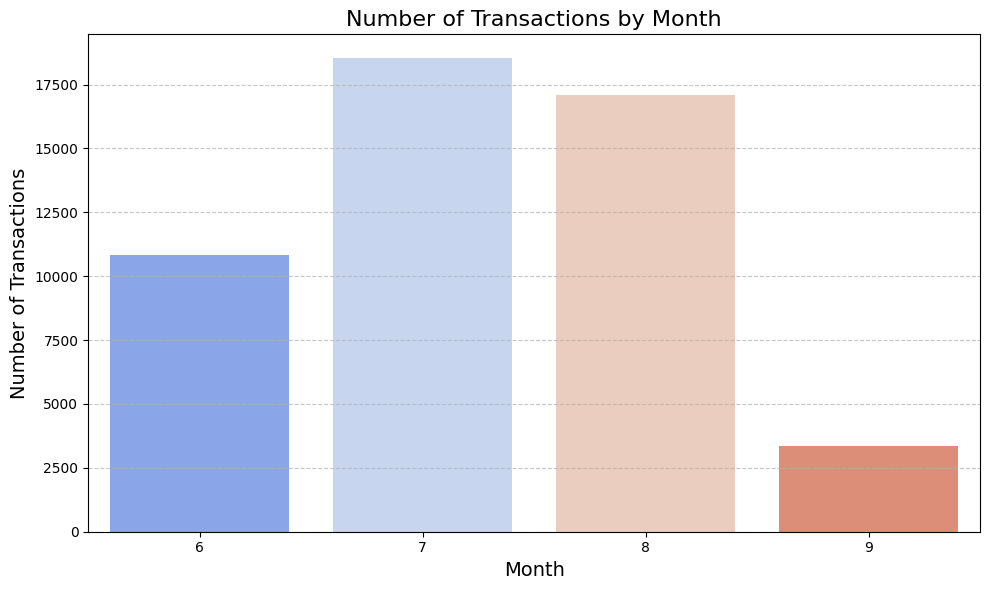

In [169]:
transactions_by_month = transactions_df['PURCHASE_MONTH'].value_counts().sort_index()

# Plot the number of transactions by month
plt.figure(figsize=(10, 6))
sns.barplot(x=transactions_by_month.index, y=transactions_by_month.values, palette="coolwarm")
plt.title("Number of Transactions by Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Transactions", fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-167-0dc451ce67af>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_growth_by_year.index, y=user_growth_by_year.values, palette="viridis")


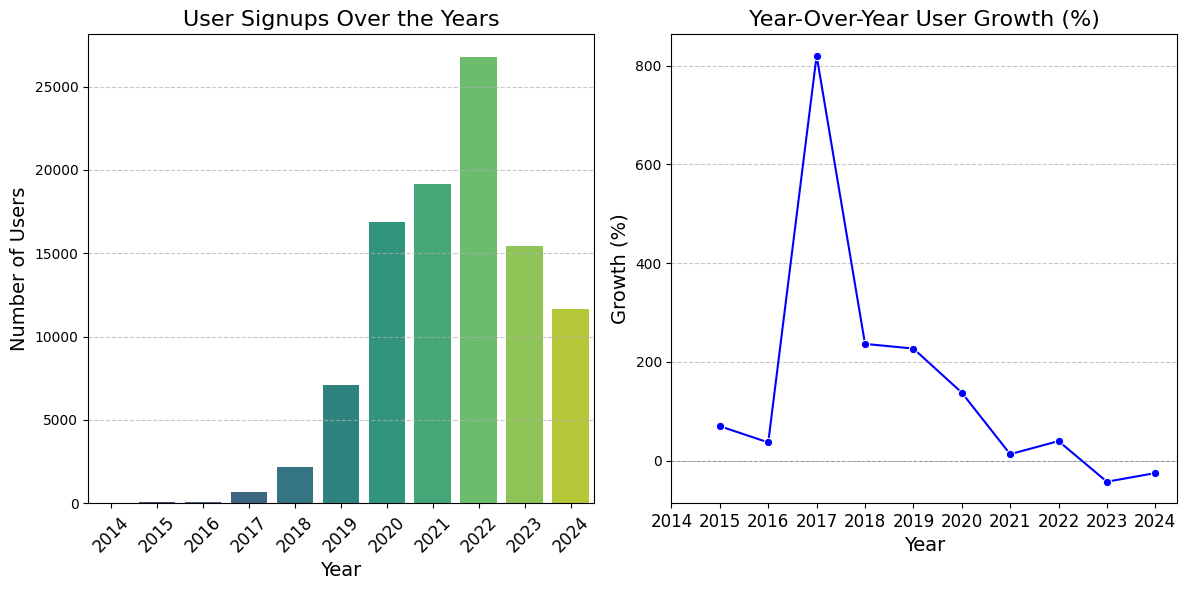

Year-over-Year User Growth (%):
CREATED_YEAR
2014           NaN
2015     70.000000
2016     37.254902
2017    820.000000
2018    236.645963
2019    227.167897
2020    138.023403
2021     13.481016
2022     39.918576
2023    -42.313575
2024    -24.786601
Name: ID, dtype: float64


In [167]:
users_df['CREATED_DATE'] = pd.to_datetime(users_df['CREATED_DATE'], errors='coerce')


users_df['CREATED_YEAR'] = users_df['CREATED_DATE'].dt.year

# Count the number of users by year
user_growth_by_year = users_df.groupby('CREATED_YEAR')['ID'].count().sort_index()

# Calculate YoY growth
user_growth_yoy = user_growth_by_year.pct_change() * 100

# Plot the user growth and YoY growth
plt.figure(figsize=(12, 6))

# Plot User Signups Over the Years
plt.subplot(1, 2, 1)
sns.barplot(x=user_growth_by_year.index, y=user_growth_by_year.values, palette="viridis")
plt.title("User Signups Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Users", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot YoY Growth
plt.subplot(1, 2, 2)
sns.lineplot(x=user_growth_yoy.index, y=user_growth_yoy, marker="o", color="blue")
plt.title("Year-Over-Year User Growth (%)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Growth (%)", fontsize=14)
plt.xticks(user_growth_yoy.index, fontsize=12)
plt.axhline(0, color="gray", linestyle="--", linewidth=0.7, alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Print the YoY growth values
print("Year-over-Year User Growth (%):")
print(user_growth_yoy)

In [158]:
sales_by_year

,FINAL_SALE
PURCHASE_YEAR,
2024.0,886.82
